Title : Data Visualization I

1. Use the inbuilt dataset 'titanic'. The dataset contains 891 
rows and contains information about the passengers who 
boarded the unfortunate Titanic ship. Use the Seaborn library 
to see if we can find any patterns in the data. 
2. Write a code to check how the price of the ticket (column 
name: 'fare') for each passenger is distributed by plotting a 
histogram. 

In [3]:
# Import Libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Shape = no of rows, no of columns
titanic.shape

(891, 12)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Count of NULL values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Handling NULL values
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked'] = titanic['Embarked'].fillna('C')

In [9]:
titanic.drop('Cabin',axis=1,inplace=True)

In [15]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# Replace fare value 0 by mean of non-zero values
mean_value = titanic[titanic["Fare"] != 0]["Fare"].mean()  
titanic["Fare"] = titanic["Fare"].replace(0, mean_value) 

In [17]:
titanic[titanic["Fare"]==0].count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

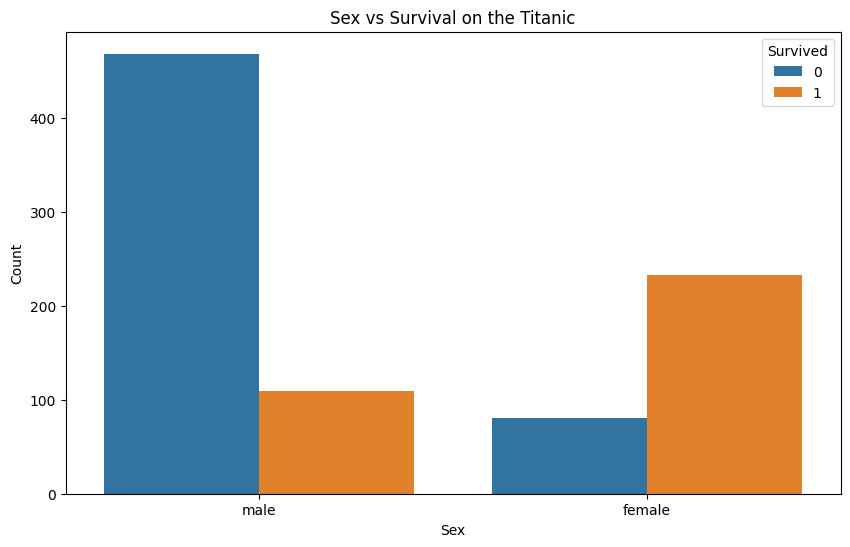

In [19]:
# Count plot : distribution of survivors and non-survivors on the Titanic, categorized by gender (Male/Female).
plt.figure(figsize=(10, 6))
sb.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Sex vs Survival on the Titanic')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

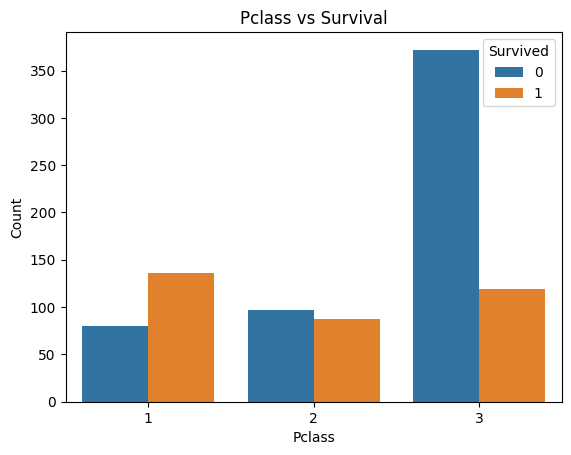

In [22]:
# Count plot : distribution of survivors and non-survivors on the Titanic, categorized by passenger class (Pclass).
sb.countplot(data=titanic, x="Pclass", hue="Survived")
plt.title('Pclass vs Survival')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

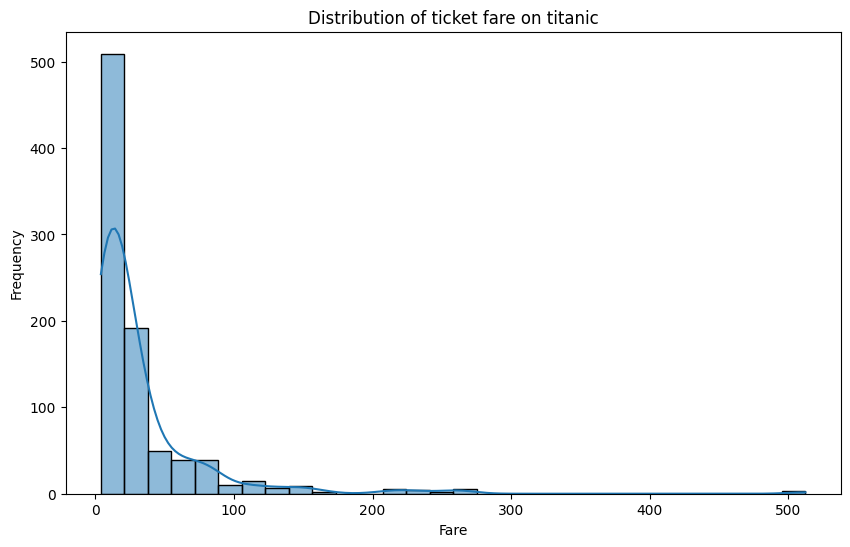

In [24]:
# Plotting the distribution of the 'fare' column using a histogram
plt.figure(figsize=(10,6))
sb.histplot(titanic['Fare'],bins=30,kde=True)
plt.title('Distribution of ticket fare on titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

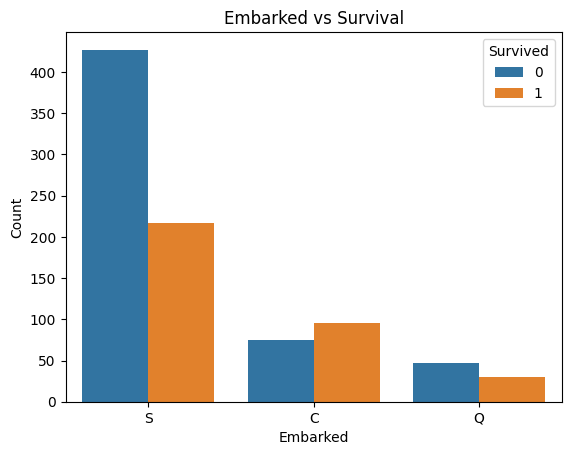

In [39]:
# Count plot : distribution of survivors and non-survivors on the Titanic, categorized by embarkation point (Embarked).
sb.countplot(data=titanic, x="Embarked", hue="Survived")
plt.title('Embarked vs Survival')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

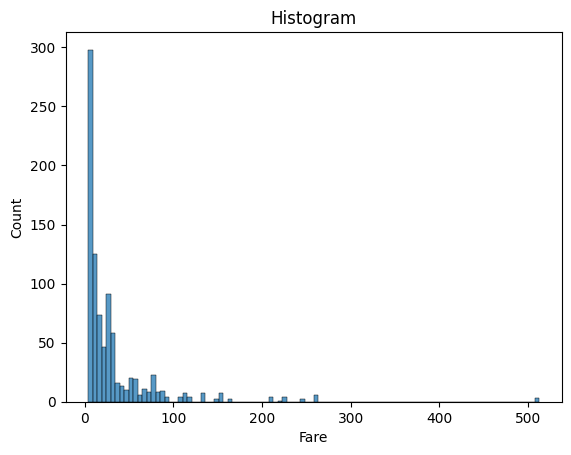

In [44]:
# Histogram : distribution of ticket fares on the Titanic using a histogram, with 100 bins to visualize the frequency of different fare values.
sb.histplot(data=titanic, x="Fare", bins=100)
plt.title('Histogram')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

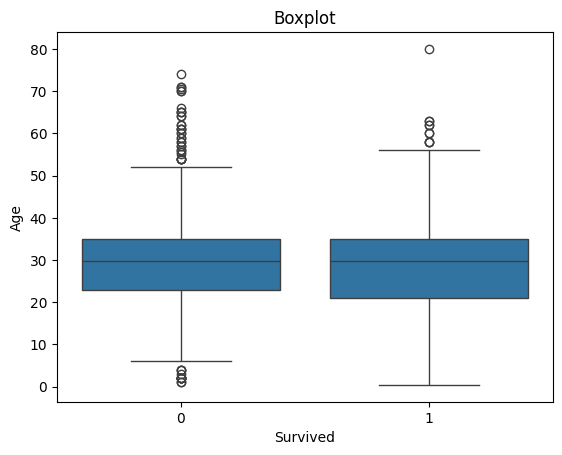

In [45]:
# Boxplot : distribution of ages for survivors and non-survivors on the Titanic, showing the median, quartiles, 
# and any potential outliers in age for each survival group.
sb.boxplot(data=titanic, x="Survived", y="Age")
plt.title('Boxplot')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

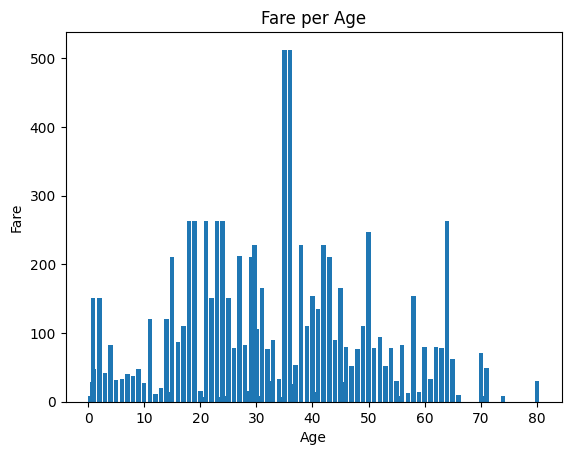

In [48]:
# Bargraph: relationship between the age and fare of passengers on the Titanic, with each bar representing the fare corresponding to a specific age.
plt.bar(titanic['Age'], titanic['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Fare per Age")
plt.show()

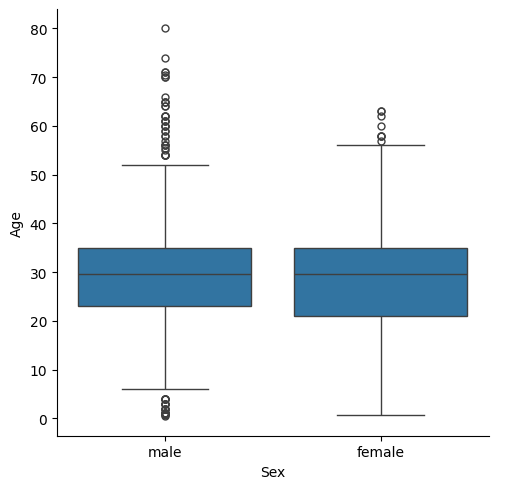

In [50]:
# Catplot : distribution of ages for male and female passengers on the Titanic, highlighting the median, quartiles, 
# and any potential outliers in age for each gender.
sb.catplot(x="Sex", y="Age", data=titanic, kind="box")
plt.show()

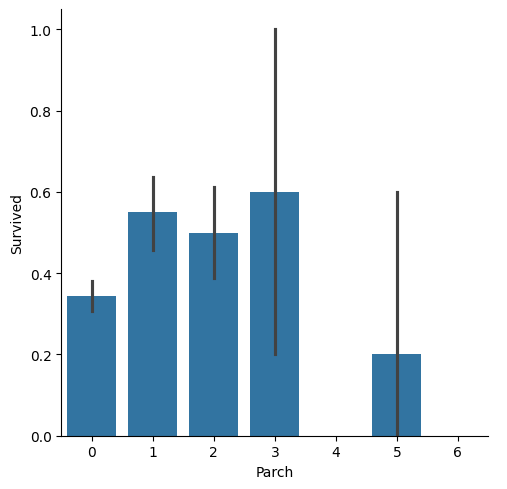

In [52]:
# survival rates based on the number of parents/children (Parch) aboard the Titanic, with the height of each bar representing 
#the count of survivors and non-survivors for each Parch category.
sb.catplot(x="Parch", y ="Survived", data = titanic, kind="bar")
plt.show()

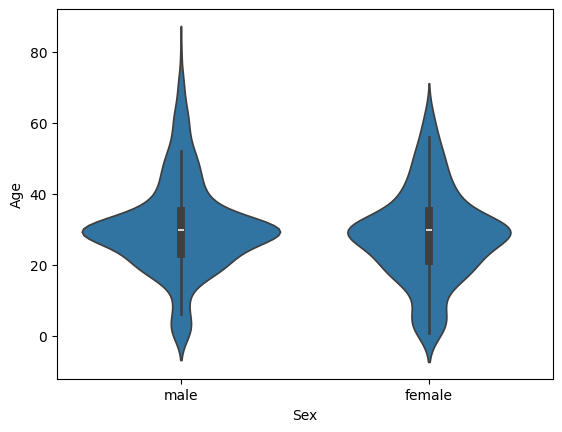

In [54]:
# violinplot : distribution of ages for male and female passengers on the Titanic, combining a boxplot and a kernel density estimate (KDE) to display the age distribution and its density for each gender.
sb.violinplot(x=titanic['Sex'],y=titanic['Age'])
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

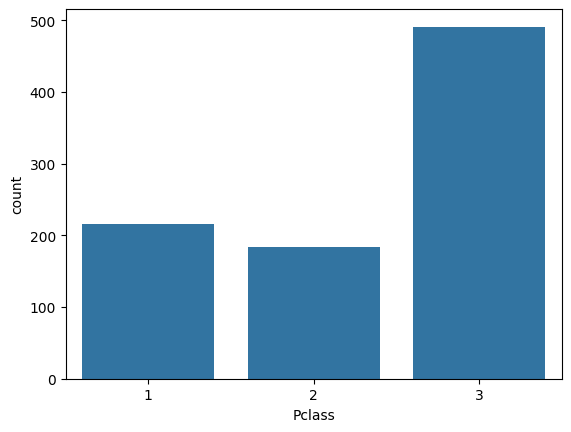

In [55]:
# Count plot
# Number of passengers in each class
sb.countplot(data=titanic, x="Pclass")

In [56]:
# Create Age Group column
bins = [0, 10, 20, 30, 40, 50, 60, 100]
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61+"]
titanic["AgeGroup"] = pd.cut(titanic["Age"], bins=bins, labels=labels, right=False)

In [57]:
# Count survivors and non-survivors per age group
age_survival = titanic.groupby(["AgeGroup", "Survived"],observed=True).size().unstack(fill_value=0)
age_survival.columns = ["Not Survived", "Survived"]

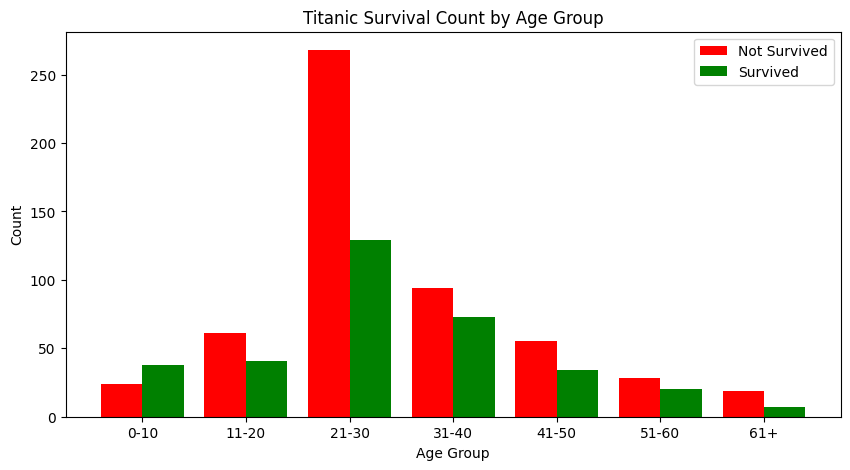

In [58]:
# Plot separate bars for Not Survived and Survived
plt.figure(figsize=(10, 5))
bar_width = 0.4
x = range(len(age_survival))
plt.bar(x, age_survival["Not Survived"], width=bar_width, color="red", label="Not Survived", align="center")
plt.bar([i + bar_width for i in x], age_survival["Survived"], width=bar_width, color="green", label="Survived", align="center")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Titanic Survival Count by Age Group")
plt.xticks([i + bar_width / 2 for i in x], age_survival.index, rotation=0)
plt.legend()
plt.show()

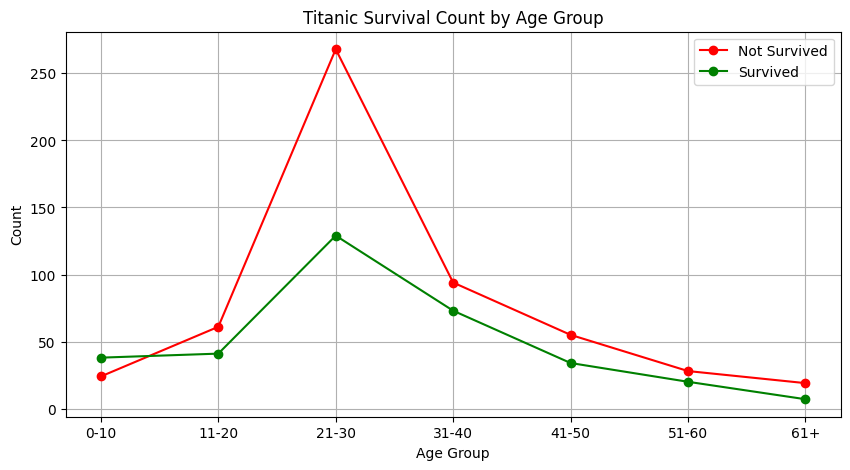

In [59]:
# count of survivors and non-survivors on the Titanic across different age groups.
plt.figure(figsize=(10, 5))
plt.plot(age_survival.index, age_survival["Not Survived"], marker='o', linestyle='-', color='red', label="Not Survived")
plt.plot(age_survival.index, age_survival["Survived"], marker='o', linestyle='-', color='green', label="Survived")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Titanic Survival Count by Age Group")
plt.legend()
plt.grid(True)  
plt.show()

C:\Users\riyas\AppData\Local\Temp\ipykernel_34244\1457800432.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = titanic.groupby("AgeGroup")["Survived"].mean()


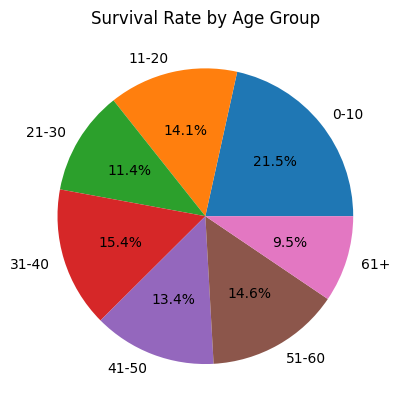

In [60]:
age_group_survival = titanic.groupby("AgeGroup")["Survived"].mean()
plt.pie(age_group_survival, labels=age_group_survival.index, autopct='%1.1f%%')
plt.title("Survival Rate by Age Group")
plt.show()